In [4]:
import pandas as pd

df_electricity_prices = pd.read_csv('/content/electricity_prices.csv')
df_electricity_prices.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [7]:
df_gas_prices = pd.read_csv('/content/gas_prices.csv')
df_gas_prices.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [8]:
import plotly.graph_objects as go

df_electricity_prices_daily = df_electricity_prices.groupby(pd.to_datetime(df_electricity_prices['forecast_date']).dt.date)['euros_per_mwh'].mean().reset_index()

trace1 = go.Scatter(x=df_electricity_prices['forecast_date'], y=df_electricity_prices['euros_per_mwh'], mode='lines', name='Electricity Prices', line=dict(color='gray'))
trace2 = go.Scatter(x=df_electricity_prices_daily['forecast_date'], y=df_electricity_prices_daily['euros_per_mwh'], mode='lines', name='Daily Average', line=dict(color='orange'))
layout = go.Layout(title='Electricity Prices and Daily Average', showlegend=True)
fig = go.Figure(data=[trace1, trace2], layout=layout)

fig.show()

In [10]:
df_electricity_prices[df_electricity_prices['euros_per_mwh']==4000].euros_mer_mwh = 750.08
import plotly.graph_objects as go

trace1 = go.Scatter(x=df_gas_prices['forecast_date'], y=df_gas_prices['lowest_price_per_mwh'], mode='lines', name='Lowest Price', line=dict(color='blue'))

trace2 = go.Scatter(x=df_gas_prices['forecast_date'], y=df_gas_prices['highest_price_per_mwh'], mode='lines', name='Highest Price', line=dict(color='red'))

layout = go.Layout(title='Gas Highest & Lowest price', showlegend=True)

fig = go.Figure(data=[trace1, trace2], layout=layout)

fig.show()

DATA PREPROCESSING
--------------------------------------------------------------------------------
✓ Date columns converted to datetime format
✓ Additional time features created
  Gas date range: 2021-09-01 00:00:00 to 2023-05-30 00:00:00
  Electricity date range: 2021-09-01 00:00:00 to 2023-05-30 23:00:00
MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------
Gas Prices:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
✓ No missing values found
Electricity Prices:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
✓ No missing values found
DESCRIPTIVE STATISTICS
--------------------------------------------------------------------------------
Gas Prices Statistics:
       lowest_price_per_mwh  highest_price_per_mwh  price_range  \
count            637.000000             637.000000   637.000000   
mean              95.036750             107.754631    12.717881   
std               47.552295              54.7436

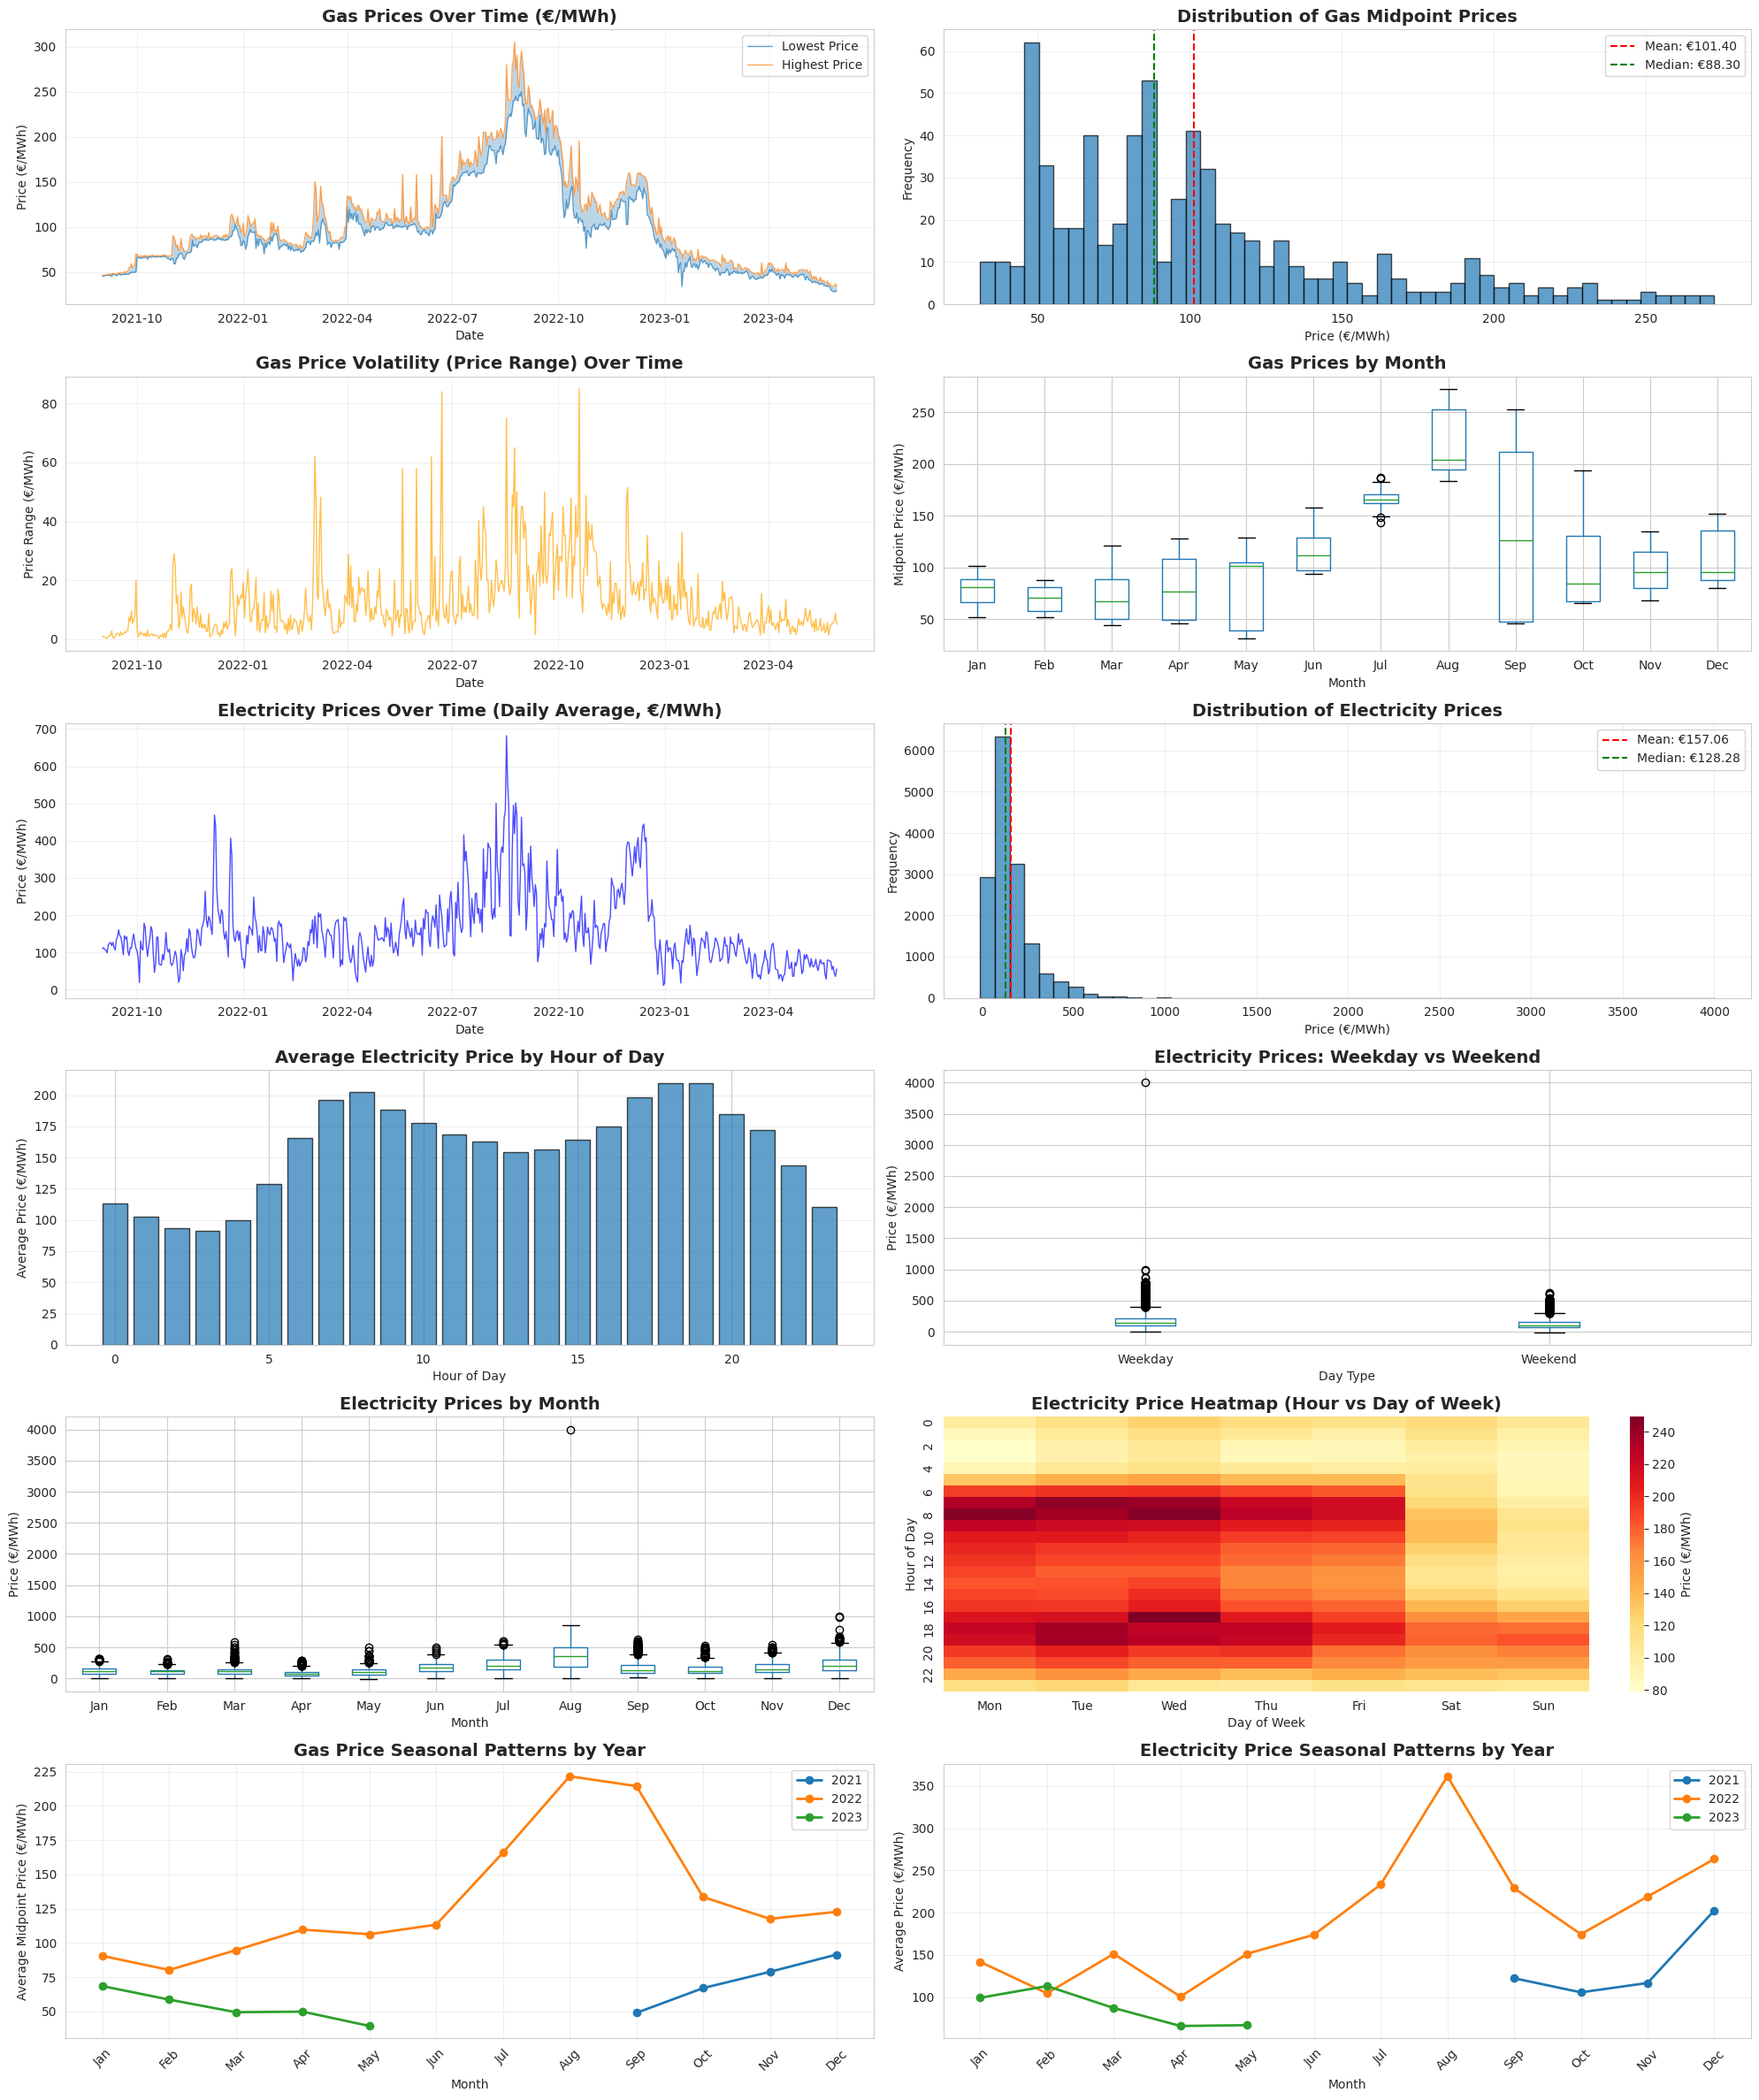

In [19]:
"""
Exploratory Data Analysis (EDA) for Gas and Electricity Prices
================================================================
This script performs comprehensive EDA on gas and electricity price datasets.

Datasets:
- gas_prices.csv: Daily gas prices with forecast dates
- electricity_prices.csv: Hourly electricity prices with forecast dates
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 10

electricity_df = pd.read_csv('/content/electricity_prices.csv')
gas_df = pd.read_csv('/content/gas_prices.csv')

# ============================================================================
# DATA PREPROCESSING
# ============================================================================

print("DATA PREPROCESSING")
print("-"*80)

# Convert date columns to datetime
gas_df['forecast_date'] = pd.to_datetime(gas_df['forecast_date'])
gas_df['origin_date'] = pd.to_datetime(gas_df['origin_date'])

electricity_df['forecast_date'] = pd.to_datetime(electricity_df['forecast_date'])
electricity_df['origin_date'] = pd.to_datetime(electricity_df['origin_date'])

print("✓ Date columns converted to datetime format")

# Create additional time features for gas prices
gas_df['year'] = gas_df['forecast_date'].dt.year
gas_df['month'] = gas_df['forecast_date'].dt.month
gas_df['quarter'] = gas_df['forecast_date'].dt.quarter
gas_df['day_of_week'] = gas_df['forecast_date'].dt.dayofweek
gas_df['week_of_year'] = gas_df['forecast_date'].dt.isocalendar().week

# Calculate price range and midpoint for gas
gas_df['price_range'] = gas_df['highest_price_per_mwh'] - gas_df['lowest_price_per_mwh']
gas_df['price_midpoint'] = (gas_df['highest_price_per_mwh'] + gas_df['lowest_price_per_mwh']) / 2

# Create additional time features for electricity prices
electricity_df['year'] = electricity_df['forecast_date'].dt.year
electricity_df['month'] = electricity_df['forecast_date'].dt.month
electricity_df['quarter'] = electricity_df['forecast_date'].dt.quarter
electricity_df['day_of_week'] = electricity_df['forecast_date'].dt.dayofweek
electricity_df['hour'] = electricity_df['forecast_date'].dt.hour
electricity_df['date'] = electricity_df['forecast_date'].dt.date
electricity_df['is_weekend'] = electricity_df['day_of_week'].isin([5, 6]).astype(int)

print("✓ Additional time features created")
print(f"  Gas date range: {gas_df['forecast_date'].min()} to {gas_df['forecast_date'].max()}")
print(f"  Electricity date range: {electricity_df['forecast_date'].min()} to {electricity_df['forecast_date'].max()}")

# ============================================================================
# MISSING VALUES ANALYSIS
# ============================================================================

print("MISSING VALUES ANALYSIS")
print("-"*80)

print("Gas Prices:")
gas_missing = gas_df.isnull().sum()
gas_missing_pct = (gas_missing / len(gas_df)) * 100
gas_missing_df = pd.DataFrame({
    'Missing Count': gas_missing,
    'Percentage': gas_missing_pct
})
print(gas_missing_df[gas_missing_df['Missing Count'] > 0])
if gas_missing.sum() == 0:
    print("✓ No missing values found")

print("Electricity Prices:")
elec_missing = electricity_df.isnull().sum()
elec_missing_pct = (elec_missing / len(electricity_df)) * 100
elec_missing_df = pd.DataFrame({
    'Missing Count': elec_missing,
    'Percentage': elec_missing_pct
})
print(elec_missing_df[elec_missing_df['Missing Count'] > 0])
if elec_missing.sum() == 0:
    print("✓ No missing values found")

# ============================================================================
# DESCRIPTIVE STATISTICS
# ============================================================================

print("DESCRIPTIVE STATISTICS")
print("-"*80)

print("Gas Prices Statistics:")
print(gas_df[['lowest_price_per_mwh', 'highest_price_per_mwh',
              'price_range', 'price_midpoint']].describe())

print(" Electricity Prices Statistics:")
print(electricity_df['euros_per_mwh'].describe())

# Additional statistics
print("Additional Gas Price Statistics:")
print(f"  Mean lowest price: €{gas_df['lowest_price_per_mwh'].mean():.2f}/MWh")
print(f"  Mean highest price: €{gas_df['highest_price_per_mwh'].mean():.2f}/MWh")
print(f"  Overall price volatility (avg range): €{gas_df['price_range'].mean():.2f}/MWh")
print(f"  Maximum price spread: €{gas_df['price_range'].max():.2f}/MWh")

print("Additional Electricity Price Statistics:")
print(f"  Mean price: €{electricity_df['euros_per_mwh'].mean():.2f}/MWh")
print(f"  Median price: €{electricity_df['euros_per_mwh'].median():.2f}/MWh")
print(f"  Standard deviation: €{electricity_df['euros_per_mwh'].std():.2f}/MWh")
print(f"  Coefficient of variation: {(electricity_df['euros_per_mwh'].std() / electricity_df['euros_per_mwh'].mean()) * 100:.2f}%")

# Check for negative prices
negative_prices = electricity_df[electricity_df['euros_per_mwh'] < 0]
print(f"Negative prices found: {len(negative_prices)} instances ({len(negative_prices)/len(electricity_df)*100:.2f}%)")
if len(negative_prices) > 0:
    print(f"  Minimum price: €{electricity_df['euros_per_mwh'].min():.2f}/MWh")
    print(f"  Average negative price: €{negative_prices['euros_per_mwh'].mean():.2f}/MWh")

# ============================================================================
# OUTLIER DETECTION (IQR METHOD)
# ============================================================================

print("OUTLIER DETECTION (IQR METHOD)")
print("-"*80)

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print(" Gas Prices Outliers:")
for col in ['lowest_price_per_mwh', 'highest_price_per_mwh', 'price_midpoint']:
    outliers, lower, upper = detect_outliers_iqr(gas_df, col)
    print(f"  {col}: {len(outliers)} outliers ({len(outliers)/len(gas_df)*100:.2f}%)")
    print(f"    Valid range: [{lower:.2f}, {upper:.2f}]")

print(" Electricity Prices Outliers:")
outliers_elec, lower_elec, upper_elec = detect_outliers_iqr(electricity_df, 'euros_per_mwh')
print(f"  euros_per_mwh: {len(outliers_elec)} outliers ({len(outliers_elec)/len(electricity_df)*100:.2f}%)")
print(f"    Valid range: [{lower_elec:.2f}, {upper_elec:.2f}]")

# ============================================================================
# TEMPORAL PATTERNS
# ============================================================================

print("TEMPORAL PATTERNS ANALYSIS")
print("-"*80)

print(" Gas Prices by Year:")
yearly_gas = gas_df.groupby('year').agg({
    'price_midpoint': ['mean', 'min', 'max', 'std']
}).round(2)
print(yearly_gas)

print(" Gas Prices by Month:")
monthly_gas = gas_df.groupby('month').agg({
    'price_midpoint': ['mean', 'std']
}).round(2)
monthly_gas.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(monthly_gas)

print(" Electricity Prices by Year:")
yearly_elec = electricity_df.groupby('year')['euros_per_mwh'].agg(['mean', 'min', 'max', 'std']).round(2)
print(yearly_elec)

print(" Electricity Prices by Hour of Day:")
hourly_elec = electricity_df.groupby('hour')['euros_per_mwh'].agg(['mean', 'std']).round(2)
print(hourly_elec)

print(" Electricity Prices: Weekday vs Weekend:")
weekend_comparison = electricity_df.groupby('is_weekend')['euros_per_mwh'].agg(['mean', 'std', 'min', 'max']).round(2)
weekend_comparison.index = ['Weekday', 'Weekend']
print(weekend_comparison)

# ============================================================================
# CORRELATION ANALYSIS
# ============================================================================

print("CORRELATION ANALYSIS")
print("-"*80)

print(" Gas Prices Correlations:")
gas_corr = gas_df[['lowest_price_per_mwh', 'highest_price_per_mwh',
                     'price_range', 'price_midpoint']].corr()
print(gas_corr.round(3))

# ============================================================================
# VISUALIZATION
# ============================================================================
print(". CORRELATION ANALYSIS")
print("-"*80)
# Create a comprehensive visualization figure
fig = plt.figure(figsize=(20, 24))

# ---- GAS PRICES VISUALIZATIONS ----

# 1. Time series of gas prices
ax1 = plt.subplot(6, 2, 1)
ax1.plot(gas_df['forecast_date'], gas_df['lowest_price_per_mwh'],
         label='Lowest Price', alpha=0.7, linewidth=1)
ax1.plot(gas_df['forecast_date'], gas_df['highest_price_per_mwh'],
         label='Highest Price', alpha=0.7, linewidth=1)
ax1.fill_between(gas_df['forecast_date'],
                  gas_df['lowest_price_per_mwh'],
                  gas_df['highest_price_per_mwh'],
                  alpha=0.3)
ax1.set_title('Gas Prices Over Time (€/MWh)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (€/MWh)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Distribution of gas prices
ax2 = plt.subplot(6, 2, 2)
ax2.hist(gas_df['price_midpoint'], bins=50, edgecolor='black', alpha=0.7)
ax2.axvline(gas_df['price_midpoint'].mean(), color='red',
            linestyle='--', label=f'Mean: €{gas_df["price_midpoint"].mean():.2f}')
ax2.axvline(gas_df['price_midpoint'].median(), color='green',
            linestyle='--', label=f'Median: €{gas_df["price_midpoint"].median():.2f}')
ax2.set_title('Distribution of Gas Midpoint Prices', fontsize=14, fontweight='bold')
ax2.set_xlabel('Price (€/MWh)')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Gas price volatility over time
ax3 = plt.subplot(6, 2, 3)
ax3.plot(gas_df['forecast_date'], gas_df['price_range'],
         color='orange', alpha=0.7, linewidth=1)
ax3.set_title('Gas Price Volatility (Price Range) Over Time', fontsize=14, fontweight='bold')
ax3.set_xlabel('Date')
ax3.set_ylabel('Price Range (€/MWh)')
ax3.grid(True, alpha=0.3)

# 4. Monthly box plot for gas prices
ax4 = plt.subplot(6, 2, 4)
gas_df.boxplot(column='price_midpoint', by='month', ax=ax4)
ax4.set_title('Gas Prices by Month', fontsize=14, fontweight='bold')
ax4.set_xlabel('Month')
ax4.set_ylabel('Midpoint Price (€/MWh)')
plt.sca(ax4)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.suptitle('')  # Remove auto-generated title

# ---- ELECTRICITY PRICES VISUALIZATIONS ----

# 5. Time series of electricity prices (daily average)
ax5 = plt.subplot(6, 2, 5)
daily_elec = electricity_df.groupby('date')['euros_per_mwh'].mean().reset_index()
daily_elec['date'] = pd.to_datetime(daily_elec['date'])
ax5.plot(daily_elec['date'], daily_elec['euros_per_mwh'],
         color='blue', alpha=0.7, linewidth=1)
ax5.set_title('Electricity Prices Over Time (Daily Average, €/MWh)',
              fontsize=14, fontweight='bold')
ax5.set_xlabel('Date')
ax5.set_ylabel('Price (€/MWh)')
ax5.grid(True, alpha=0.3)

# 6. Distribution of electricity prices
ax6 = plt.subplot(6, 2, 6)
ax6.hist(electricity_df['euros_per_mwh'], bins=50, edgecolor='black', alpha=0.7)
ax6.axvline(electricity_df['euros_per_mwh'].mean(), color='red',
            linestyle='--', label=f'Mean: €{electricity_df["euros_per_mwh"].mean():.2f}')
ax6.axvline(electricity_df['euros_per_mwh'].median(), color='green',
            linestyle='--', label=f'Median: €{electricity_df["euros_per_mwh"].median():.2f}')
ax6.set_title('Distribution of Electricity Prices', fontsize=14, fontweight='bold')
ax6.set_xlabel('Price (€/MWh)')
ax6.set_ylabel('Frequency')
ax6.legend()
ax6.grid(True, alpha=0.3)

# 7. Hourly pattern of electricity prices
ax7 = plt.subplot(6, 2, 7)
hourly_pattern = electricity_df.groupby('hour')['euros_per_mwh'].mean()
ax7.bar(hourly_pattern.index, hourly_pattern.values, alpha=0.7, edgecolor='black')
ax7.set_title('Average Electricity Price by Hour of Day', fontsize=14, fontweight='bold')
ax7.set_xlabel('Hour of Day')
ax7.set_ylabel('Average Price (€/MWh)')
ax7.grid(True, alpha=0.3, axis='y')

# 8. Weekday vs Weekend electricity prices
ax8 = plt.subplot(6, 2, 8)
electricity_df.boxplot(column='euros_per_mwh', by='is_weekend', ax=ax8)
ax8.set_title('Electricity Prices: Weekday vs Weekend', fontsize=14, fontweight='bold')
ax8.set_xlabel('Day Type')
ax8.set_ylabel('Price (€/MWh)')
plt.sca(ax8)
plt.xticks([1, 2], ['Weekday', 'Weekend'])
plt.suptitle('')

# 9. Monthly box plot for electricity prices
ax9 = plt.subplot(6, 2, 9)
electricity_df.boxplot(column='euros_per_mwh', by='month', ax=ax9)
ax9.set_title('Electricity Prices by Month', fontsize=14, fontweight='bold')
ax9.set_xlabel('Month')
ax9.set_ylabel('Price (€/MWh)')
plt.sca(ax9)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.suptitle('')

# 10. Electricity price heatmap by hour and day of week
ax10 = plt.subplot(6, 2, 10)
pivot_hourly = electricity_df.pivot_table(
    values='euros_per_mwh',
    index='hour',
    columns='day_of_week',
    aggfunc='mean'
)
sns.heatmap(pivot_hourly, cmap='YlOrRd', ax=ax10, cbar_kws={'label': 'Price (€/MWh)'})
ax10.set_title('Electricity Price Heatmap (Hour vs Day of Week)',
               fontsize=14, fontweight='bold')
ax10.set_xlabel('Day of Week')
ax10.set_ylabel('Hour of Day')
ax10.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# 11. Yearly comparison for gas prices
ax11 = plt.subplot(6, 2, 11)
yearly_gas_pivot = gas_df.groupby(['year', 'month'])['price_midpoint'].mean().reset_index()
for year in gas_df['year'].unique():
    year_data = yearly_gas_pivot[yearly_gas_pivot['year'] == year]
    ax11.plot(year_data['month'], year_data['price_midpoint'],
              marker='o', label=str(year), linewidth=2)
ax11.set_title('Gas Price Seasonal Patterns by Year', fontsize=14, fontweight='bold')
ax11.set_xlabel('Month')
ax11.set_ylabel('Average Midpoint Price (€/MWh)')
ax11.legend()
ax11.grid(True, alpha=0.3)
ax11.set_xticks(range(1, 13))
ax11.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# 12. Yearly comparison for electricity prices
ax12 = plt.subplot(6, 2, 12)
yearly_elec_pivot = electricity_df.groupby(['year', 'month'])['euros_per_mwh'].mean().reset_index()
for year in electricity_df['year'].unique():
    year_data = yearly_elec_pivot[yearly_elec_pivot['year'] == year]
    ax12.plot(year_data['month'], year_data['euros_per_mwh'],
              marker='o', label=str(year), linewidth=2)
ax12.set_title('Electricity Price Seasonal Patterns by Year', fontsize=14, fontweight='bold')
ax12.set_xlabel('Month')
ax12.set_ylabel('Average Price (€/MWh)')
ax12.legend()
ax12.grid(True, alpha=0.3)
ax12.set_xticks(range(1, 13))
ax12.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.tight_layout()
plt.savefig('/content/energy_prices_eda_comprehensive.png',
            dpi=300, bbox_inches='tight')
print("✓ Comprehensive visualization saved: energy_prices_eda_comprehensive.png")

# ============================================================================
# KEY INSIGHTS AND FINDINGS
# ============================================================================

print("KEY INSIGHTS AND FINDINGS")
print("="*80)

# Gas prices insights
gas_max_idx = gas_df['price_midpoint'].idxmax()
gas_min_idx = gas_df['price_midpoint'].idxmin()

print("\n10.1 GAS PRICES:")
print(f"  • Period covered: {gas_df['forecast_date'].min().date()} to {gas_df['forecast_date'].max().date()}")
print(f"  • Total observations: {len(gas_df)} days")
print(f"  • Average price: €{gas_df['price_midpoint'].mean():.2f}/MWh")
print(f"  • Price range: €{gas_df['price_midpoint'].min():.2f} - €{gas_df['price_midpoint'].max():.2f}/MWh")
print(f"  • Highest price recorded: €{gas_df.loc[gas_max_idx, 'price_midpoint']:.2f}/MWh on {gas_df.loc[gas_max_idx, 'forecast_date'].date()}")
print(f"  • Lowest price recorded: €{gas_df.loc[gas_min_idx, 'price_midpoint']:.2f}/MWh on {gas_df.loc[gas_min_idx, 'forecast_date'].date()}")
print(f"  • Average daily volatility: €{gas_df['price_range'].mean():.2f}/MWh")

# Find most volatile period
most_volatile_month = gas_df.groupby(['year', 'month'])['price_range'].mean().idxmax()
print(f"  • Most volatile period: {most_volatile_month[0]}-{most_volatile_month[1]:02d}")

# Electricity prices insights
elec_max_idx = electricity_df['euros_per_mwh'].idxmax()
elec_min_idx = electricity_df['euros_per_mwh'].idxmin()

print("\n10.2 ELECTRICITY PRICES:")
print(f"  • Period covered: {electricity_df['forecast_date'].min().date()} to {electricity_df['forecast_date'].max().date()}")
print(f"  • Total observations: {len(electricity_df)} hours")
print(f"  • Average price: €{electricity_df['euros_per_mwh'].mean():.2f}/MWh")
print(f"  • Price range: €{electricity_df['euros_per_mwh'].min():.2f} - €{electricity_df['euros_per_mwh'].max():.2f}/MWh")
print(f"  • Highest price: €{electricity_df.loc[elec_max_idx, 'euros_per_mwh']:.2f}/MWh on {electricity_df.loc[elec_max_idx, 'forecast_date']}")
print(f"  • Lowest price: €{electricity_df.loc[elec_min_idx, 'euros_per_mwh']:.2f}/MWh on {electricity_df.loc[elec_min_idx, 'forecast_date']}")

# Peak hours
peak_hour = electricity_df.groupby('hour')['euros_per_mwh'].mean().idxmax()
off_peak_hour = electricity_df.groupby('hour')['euros_per_mwh'].mean().idxmin()
print(f"  • Peak hour: {peak_hour}:00 (avg €{electricity_df[electricity_df['hour']==peak_hour]['euros_per_mwh'].mean():.2f}/MWh)")
print(f"  • Off-peak hour: {off_peak_hour}:00 (avg €{electricity_df[electricity_df['hour']==off_peak_hour]['euros_per_mwh'].mean():.2f}/MWh)")

# Weekend vs weekday
weekday_avg = electricity_df[electricity_df['is_weekend']==0]['euros_per_mwh'].mean()
weekend_avg = electricity_df[electricity_df['is_weekend']==1]['euros_per_mwh'].mean()
print(f"  • Weekday average: €{weekday_avg:.2f}/MWh")
print(f"  • Weekend average: €{weekend_avg:.2f}/MWh")
print(f"  • Difference: {abs(weekday_avg - weekend_avg):.2f} €/MWh ({((weekday_avg - weekend_avg) / weekend_avg * 100):.1f}%)")

# Seasonal patterns
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]
summer_avg = electricity_df[electricity_df['month'].isin(summer_months)]['euros_per_mwh'].mean()
winter_avg = electricity_df[electricity_df['month'].isin(winter_months)]['euros_per_mwh'].mean()
print(f"  • Summer average (Jun-Aug): €{summer_avg:.2f}/MWh")
print(f"  • Winter average (Dec-Feb): €{winter_avg:.2f}/MWh")

print("\n10.3 PRICE CORRELATION:")
# Calculate daily averages for electricity to compare with gas
daily_elec_avg = electricity_df.groupby('date')['euros_per_mwh'].mean().reset_index()
daily_elec_avg['date'] = pd.to_datetime(daily_elec_avg['date'])

# Merge datasets on date for correlation
gas_df['date'] = gas_df['forecast_date'].dt.date
merged_df = pd.merge(
    gas_df[['date', 'price_midpoint']],
    daily_elec_avg.rename(columns={'date': 'date_dt'}),
    left_on='date',
    right_on=daily_elec_avg['date'].dt.date,
    how='inner'
)

if len(merged_df) > 0:
    correlation = merged_df['price_midpoint'].corr(merged_df['euros_per_mwh'])
    print(f"  • Correlation between daily gas and electricity prices: {correlation:.3f}")
else:
    print("  • Not enough overlapping dates to calculate correlation")